In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# imprting the dataset
OGdataset = pd.read_csv('mockData.csv')
dataset=OGdataset

In [5]:
##  Drop the columns where all elements are nan:
dataset = dataset.dropna(axis=1, how='all')
dataset = dataset.dropna(how='all')

In [6]:
#still cannot get rid of NANs from rows so interim use the following
dataset = dataset.iloc[:-4]

In [7]:
### creating dummy data
# X=pd.get_dummies(dataset['Apply6thFrm'])

# sixthFrm=dataset.Apply6thFrm.astype("category").cat.codes
# type(sixthFrm)

dataset["Apply6thFrm"] = dataset["Apply6thFrm"].astype('category')
dataset.dtypes
dataset["Apply6thFrm_cat"] = dataset["Apply6thFrm"].cat.codes
dataset.head()

,Surname Forename,Edexcel En P1 Sec A - S3 Y11 Mock 2,Edexcel En P1 Sec A - S6 Y11 Mock 2,Edexcel En P1 Sec A - R Y11 Mock 2,Edexcel Gd En P1 Sec A Y11 Mock 2,Edexcel En P1 Sec B AO5.1 Y11 Mock 2,Edexcel En P1 Sec B AO6.1 Y11 Mock 2,Attain KS4 En - GCSE P1 Y11 Mock 2,Edexcel En P2 Sec A - S Y11 Mock 2,Edexcel En P2 Sec A - R1 Y11 Mock 2,...,Edexcel En P2 Sec A - C6 Y11 Mock 2,Edexcel En P2 Sec A - C14 Y11 Mock 2,Edexcel Gd En P2 Sec A Y11 Mock 2,Edexcel En P2 Sec B AO5.1 Y11 Mock 2,Edexcel En P2 Sec B AO6.1 Y11 Mock 2,Edexcel En P2 Sec B AO5.2 Y11 Mock 2,Attain KS4 En - GCSE P2 Y11 Mock 2,Attainment KS4 En - New G Y11 Mock 2,Apply6thFrm,Apply6thFrm_cat
0,Pupil 1,3.0,3.0,8.0,3.0,11.0,7.0,4+,4.0,7.0,...,4.0,4.0,2.0,17.0,11.0,NaN,5-,4-,y,1
1,Pupil 2,3.0,0.0,0.0,1.0,9.0,4.0,2,3.0,0.0,...,0.0,0.0,1.0,8.0,5.0,NaN,2,1+,n,0
2,Pupil 3,3.0,4.0,10.0,4.0,14.0,9.0,6-,5.0,4.0,...,4.0,7.0,3.0,13.0,8.0,NaN,4,4,y,1
3,Pupil 4,3.0,2.0,3.0,2.0,3.0,5.0,2+,3.0,5.0,...,0.0,0.0,2.0,13.0,8.0,NaN,3,2+,n,0
4,Pupil 5,3.0,3.0,5.0,3.0,12.0,9.0,4,6.0,6.0,...,2.0,6.0,3.0,15.0,9.0,NaN,5-,4-,n,0


In [8]:
#dataset

In [9]:
#  custom function scaling the the raw marks into percent % for uniformity in comparison
def scaleValue(value, OldMax, OldMin, NewMax, NewMin):
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((value - OldMin) * NewRange) / OldRange) + NewMin
    
    return NewValue

In [10]:
# renaming the features to improve understanding and output
datasetCon=dataset.rename(index=str, columns={"Edexcel En P1 Sec A - S3 Y11 Mock 2": "P1:Q1-M3",
                                              "Edexcel En P1 Sec A - S6 Y11 Mock 2": "P1:Q2-M6",
                                              "Edexcel En P1 Sec A - R Y11 Mock 2":"P1:Q3-M15",
                                              "Edexcel Gd En P1 Sec A Y11 Mock 2":"GD Sec A Paper1",
                                              "Edexcel En P1 Sec B AO5.1 Y11 Mock 2":"P1:Q1-M24",
                                              "Edexcel En P1 Sec B AO6.1 Y11 Mock 2":"P1:Q2-M16",
                                              "Attain KS4 En - GCSE P1 Y11 Mock 2":"Grade: Paper 1",
                                              "Edexcel En P2 Sec A - S Y11 Mock 2":"P2:Q1-M6",
                                              "Edexcel En P2 Sec A - R1 Y11 Mock 2":"P2:Q2-M15",
                                              "Edexcel En P2 Sec A - R2 Y11 Mock 2":"P2 Q3:-M15",
                                              "Edexcel En P2 Sec A - C6 Y11 Mock 2":"P2 Q4:M6",
                                              "Edexcel En P2 Sec A - C14 Y11 Mock 2":"P2 Q5:-M14",
                                              "Edexcel Gd En P2 Sec A Y11 Mock 2":"Paper 2 Secion A Grade",
                                              "Edexcel En P2 Sec B AO5.1 Y11 Mock 2":"P2 Sec B Q1-M24",
                                              "Edexcel En P2 Sec B AO6.1 Y11 Mock 2":"P2 Sec B Q2-M16",
                                              "Attain KS4 En - GCSE P2 Y11 Mock 2":"Grade: Paper 2",
                                              "Attainment KS4 En - New G Y11 Mock 2":"OVERALL GRADE"})


In [11]:
# converting 4+,4,4- to floats to be mapped against 9-1 grading
# this means adding .075 to the 5+ -> 5.75
for i in range(0, len(datasetCon['Grade: Paper 1'])):
    if ('+') in datasetCon['Grade: Paper 1'].iloc[i]:
        datasetCon['Grade: Paper 1'].iloc[i] = int(datasetCon['Grade: Paper 1'].iloc[i][0]) + 0.75
    elif ('-') in datasetCon['Grade: Paper 1'].iloc[i]:
        datasetCon['Grade: Paper 1'].iloc[i] = int(datasetCon['Grade: Paper 1'].iloc[i][0]) + 0.25
    else:
        datasetCon['Grade: Paper 1'].iloc[i] = int(datasetCon['Grade: Paper 1'].iloc[i])
        
for i in range(0, len(datasetCon['Grade: Paper 1'])):
    if ('+') in datasetCon['Grade: Paper 2'].iloc[i]:
        datasetCon['Grade: Paper 2'].iloc[i] = int(datasetCon['Grade: Paper 2'].iloc[i][0]) + 0.75
    elif ('-') in datasetCon['Grade: Paper 2'].iloc[i]:
        datasetCon['Grade: Paper 2'].iloc[i] = int(datasetCon['Grade: Paper 2'].iloc[i][0]) + 0.25
    else:
        datasetCon['Grade: Paper 2'].iloc[i] = int(datasetCon['Grade: Paper 2'].iloc[i])
        
for i in range(0, len(datasetCon['OVERALL GRADE'])):
    if ('+') in datasetCon['OVERALL GRADE'].iloc[i]:
        datasetCon['OVERALL GRADE'].iloc[i] = int(datasetCon['OVERALL GRADE'].iloc[i][0]) + 0.75
    elif ('-') in datasetCon['OVERALL GRADE'].iloc[i]:
        datasetCon['OVERALL GRADE'].iloc[i] = int(datasetCon['OVERALL GRADE'].iloc[i][0]) + 0.25
    else:
        datasetCon['OVERALL GRADE'].iloc[i] = int(datasetCon['OVERALL GRADE'].iloc[i])

C:\Users\Demetrios\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# datasetCon

## Presenting findings:

### Compare overall Paper 1 v Paper 2 v Overall Grade

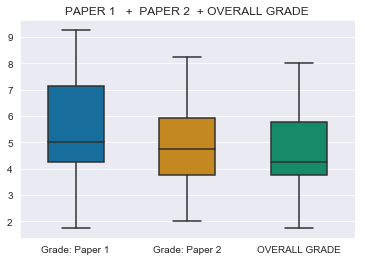

In [13]:
# creating a boxplot based on 3 features to compare

gradeBreakdown=["Grade: Paper 1","Grade: Paper 2","OVERALL GRADE"]

import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
bplot = sns.boxplot(
                 data=datasetCon[gradeBreakdown],
                 width=0.5,
                 palette="colorblind").set_title("PAPER 1   +  PAPER 2  + OVERALL GRADE")


In [14]:
datasetCon[["Grade: Paper 1","Grade: Paper 2","OVERALL GRADE"]].describe()

,Grade: Paper 1,Grade: Paper 2,OVERALL GRADE
count,78.0,78.0,78.00
unique,22.0,17.0,18.00
top,5.0,3.0,4.25
freq,10.0,9.0,15.00


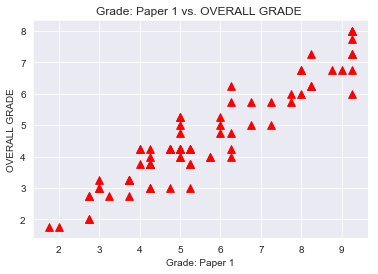

In [15]:
# creating a scatter plot of Paper 1 vs Overall grade
og=datasetCon['Grade: Paper 1']
y_col=datasetCon['OVERALL GRADE']
plt.scatter(og,y_col,s=60, c='red', marker='^') 

plt.title("Grade: Paper 1 vs. OVERALL GRADE ")
plt.xlabel('Grade: Paper 1')
plt.ylabel('OVERALL GRADE')
plt.show()

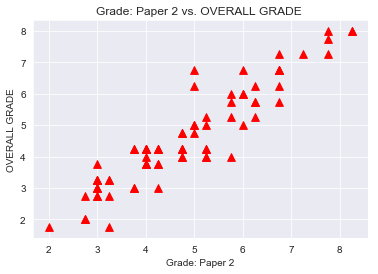

In [16]:
# creating a scatter plot of Paper 2vs Overall grade
og=datasetCon['Grade: Paper 2']
y_col=datasetCon['OVERALL GRADE']
plt.scatter(og,y_col,s=60, c='red', marker='^')

plt.title("Grade: Paper 2 vs. OVERALL GRADE ")
plt.xlabel('Grade: Paper 2')
plt.ylabel('OVERALL GRADE')
plt.show()

In [17]:
# --- Check for accuracy using zip 
# for a,b in zip(datasetCon['Grade: Paper 2'],datasetCon['OVERALL GRADE']):
#     print(a,"---",b)

## Breakdown for each question:

In [18]:
# each question has a different weighting or max mark so
# in order to compare each we must scale the marks to a %
# we will call and send arguments to the -def scaleValue() function 
datasetCon['P1:Q1-M3']=datasetCon['P1:Q1-M3'].apply(scaleValue, args=(3,0,100,0))
datasetCon['P1:Q2-M6']=datasetCon['P1:Q2-M6'].apply(scaleValue, args=(6,0,100,0))
datasetCon['P1:Q3-M15']=datasetCon['P1:Q3-M15'].apply(scaleValue, args=(15,0,100,0))
datasetCon['P1:Q1-M24']=datasetCon['P1:Q1-M24'].apply(scaleValue, args=(24,0,100,0))
datasetCon['P1:Q2-M16']=datasetCon['P1:Q2-M16'].apply(scaleValue, args=(16,0,100,0))
datasetCon['P2:Q1-M6']=datasetCon['P2:Q1-M6'].apply(scaleValue, args=(6,0,100,0))
datasetCon['P2:Q2-M15']=datasetCon['P2:Q2-M15'].apply(scaleValue, args=(15,0,100,0))
datasetCon['P2 Q4:M6']=datasetCon['P2 Q4:M6'].apply(scaleValue, args=(6,0,100,0))
datasetCon['P2 Q5:-M14']=datasetCon['P2 Q5:-M14'].apply(scaleValue, args=(14,0,100,0))
datasetCon['P2 Sec B Q1-M24']=datasetCon['P2 Sec B Q1-M24'].apply(scaleValue, args=(24,0,100,0))
datasetCon['P2 Sec B Q2-M16']=datasetCon['P2 Sec B Q2-M16'].apply(scaleValue, args=(16,0,100,0))
len(datasetCon.columns)

21

Text(0, 0.5, '%Percent')

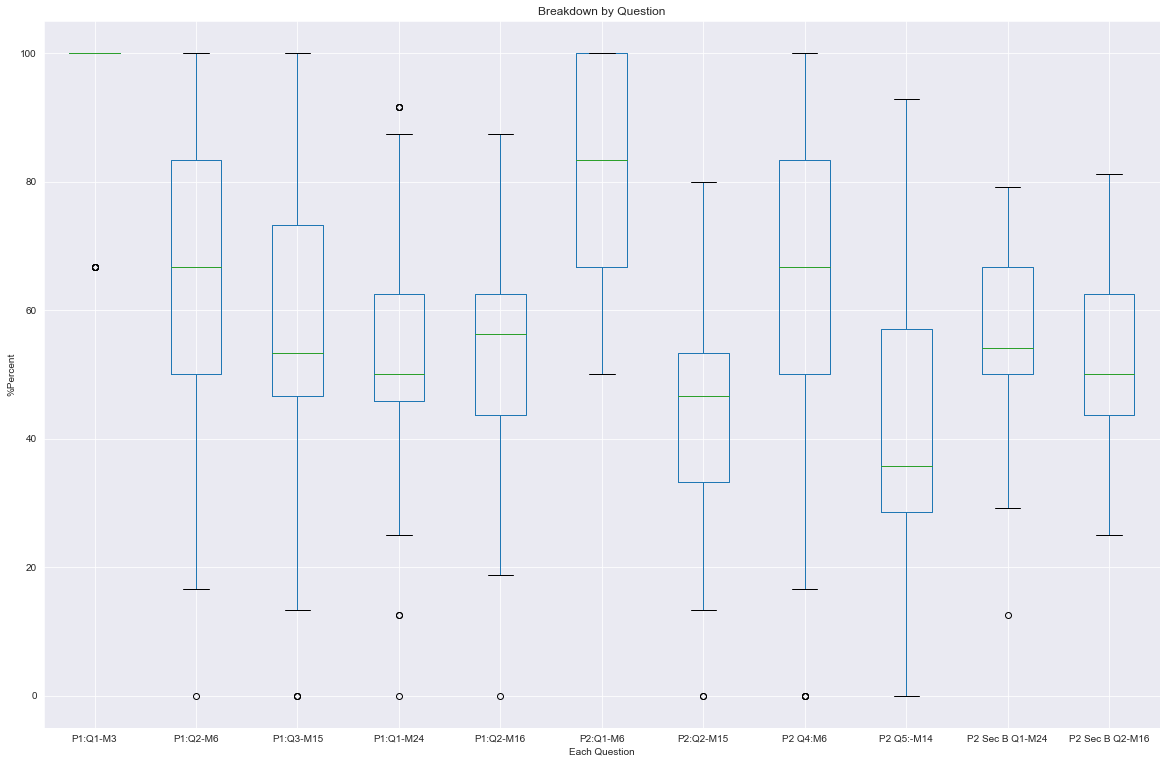

In [19]:
# creatin a boxplot based on a list of features -colsofinterest-
# this allows a clear comparison and relational picture to be drawn
colsofinterest =['P1:Q1-M3', 'P1:Q2-M6','P1:Q3-M15','P1:Q1-M24','P1:Q2-M16', 'P2:Q1-M6', 'P2:Q2-M15','P2 Q4:M6','P2 Q5:-M14','P2 Sec B Q1-M24','P2 Sec B Q2-M16']
q=datasetCon[colsofinterest].boxplot(figsize = (20,13))
q.set_title('Breakdown by Question')
q.set_xlabel("Each Question")
q.set_ylabel('%Percent')


In [20]:
## P2 Q5 M14 -- TIMING

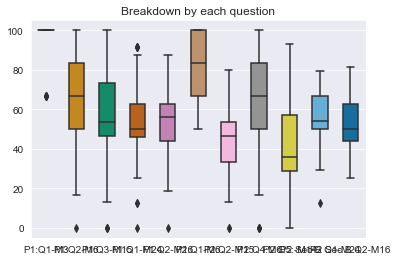

In [26]:
# boxplpot seaborn version so we import seaborn for nicer output
import seaborn as sns
%matplotlib inline

# MATPLOT Version
# datasetCon[colsofinterest].boxplot(figsize = (20,13))

# SEABORN VErsion

sns.set_style("darkgrid")
bplot = sns.boxplot(
                 data=datasetCon[colsofinterest],
                 width=0.5,
                 palette="colorblind").set_title("Breakdown by each question")

In [27]:
# a tabular breakdown for each question
datasetCon[colsofinterest].describe()

,P1:Q1-M3,P1:Q2-M6,P1:Q3-M15,P1:Q1-M24,P1:Q2-M16,P2:Q1-M6,P2:Q2-M15,P2 Q4:M6,P2 Q5:-M14,P2 Sec B Q1-M24,P2 Sec B Q2-M16
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,97.435897,62.820513,57.521368,54.113248,52.403846,83.547009,44.957265,66.452991,41.483516,56.677350,53.285256
std,8.939803,23.250173,23.394699,18.248693,17.365870,17.092734,16.203465,28.362423,23.025174,13.335020,13.276390
min,66.666667,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,12.500000,25.000000
25%,100.000000,50.000000,46.666667,45.833333,43.750000,66.666667,33.333333,50.000000,28.571429,50.000000,43.750000
50%,100.000000,66.666667,53.333333,50.000000,56.250000,83.333333,46.666667,66.666667,35.714286,54.166667,50.000000
75%,100.000000,83.333333,73.333333,62.500000,62.500000,100.000000,53.333333,83.333333,57.142857,66.666667,62.500000
max,100.000000,100.000000,100.000000,91.666667,87.500000,100.000000,80.000000,100.000000,92.857143,79.166667,81.250000


## Comparing writing Questions from Paper 1 vs. Paper 2

In [28]:
# comparing student performance between evaluation of paper 1 + 2

# since the evaluate section of each paper is based on 2 questions
# first we create a copy dataset 
# we add Q1+2 of section B together
# and we add 2 new columns to the datastrucure which are a calculation of existing columns
# finally we are printing 

colsofinterestEvaluate =['P1:Q1-M24','P1:Q2-M16','P2 Sec B Q1-M24','P2 Sec B Q2-M16']

datasetEval=datasetCon[colsofinterestEvaluate]
# these are appended to the end of datasetEval
datasetEval['Paper 1 Evaluation'] = (datasetEval["P1:Q1-M24"] + datasetEval["P1:Q2-M16"])/2
datasetEval['Paper 2 Evaluation'] = (datasetEval["P2 Sec B Q1-M24"] + datasetEval["P2 Sec B Q2-M16"])/2

# now we just print the new columns of interest
datasetEval.iloc[:2,4:]

C:\Users\Demetrios\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Demetrios\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Paper 1 Evaluation,Paper 2 Evaluation
0,44.791667,69.791667
1,31.250000,32.291667


In [29]:
# comparing student performance between evaluation of paper 1 + 2
datasetEval[['Paper 1 Evaluation','Paper 2 Evaluation']].describe()

,Paper 1 Evaluation,Paper 2 Evaluation
count,78.000000,78.000000
mean,53.258547,54.981303
std,17.126502,12.653111
min,0.000000,29.166667
25%,44.791667,46.875000
50%,52.083333,52.083333
75%,62.500000,63.281250
max,89.583333,80.208333


## Plotting Evaluation: Paper 1 v Paper 2

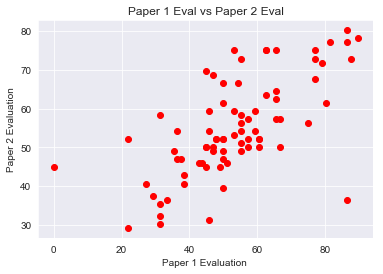

In [31]:
#visualising the training data- ACTUAL Data
X2=datasetEval.iloc[:,4:5]  # Paper 1 Evaluation
y2=datasetEval.iloc[:,5:6]  # Paper 2 Evaluation
plt.scatter(X2,y2, color="red")

plt.title("Paper 1 Eval vs Paper 2 Eval")
plt.xlabel("Paper 1 Evaluation ")
plt.ylabel("Paper 2 Evaluation")
plt.show()

## Boxplot is much better as a comparison

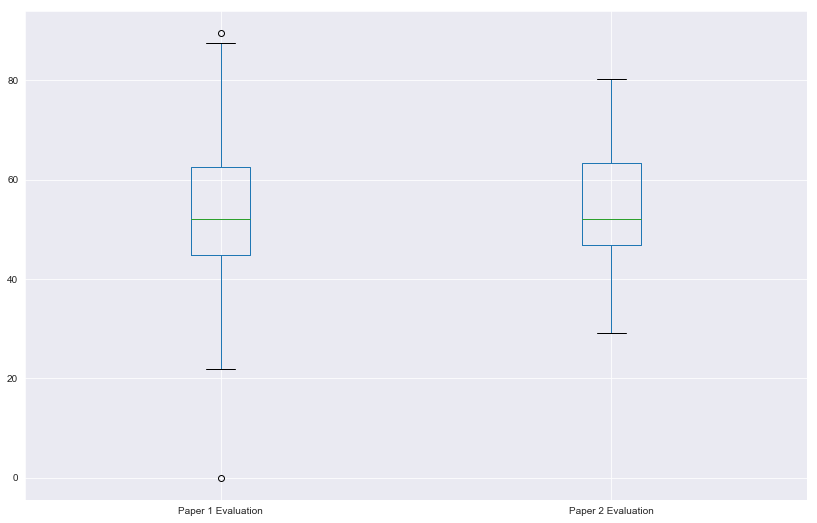

In [32]:
datasetEval[['Paper 1 Evaluation','Paper 2 Evaluation']].boxplot(figsize = (14,9))

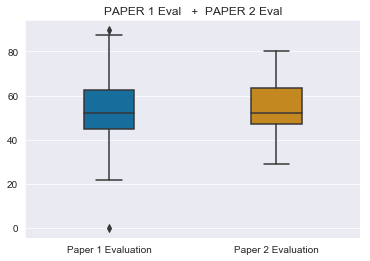

In [33]:
# Setting the list to be used to plot which is refinement of the original
colsofinterestEvalSum =['Paper 1 Evaluation','Paper 2 Evaluation'] # long var name change 
sns.set_style("darkgrid")
bplot = sns.boxplot(
                 data=datasetEval[colsofinterestEvalSum],
                 width=0.3,
                 palette="colorblind").set_title("PAPER 1 Eval   +  PAPER 2 Eval")

# Logostic Regression 

In [45]:
datasetCon.columns

Index(['Surname Forename', 'P1:Q1-M3', 'P1:Q2-M6', 'P1:Q3-M15',
       'GD Sec A Paper1', 'P1:Q1-M24', 'P1:Q2-M16', 'Grade: Paper 1',
       'P2:Q1-M6', 'P2:Q2-M15', 'P2 Q3:-M15', 'P2 Q4:M6', 'P2 Q5:-M14',
       'Paper 2 Secion A Grade', 'P2 Sec B Q1-M24', 'P2 Sec B Q2-M16',
       'Edexcel En P2 Sec B AO5.2 Y11 Mock 2', 'Grade: Paper 2',
       'OVERALL GRADE', 'Apply6thFrm', 'Apply6thFrm_cat'],
      dtype='object')

In [46]:
# dataset
colsofinterestEvalSum =['Paper 1 Evaluation','Paper 2 Evaluation']
X=datasetEval[['Paper 1 Evaluation','Paper 2 Evaluation']]
y=datasetCon['Apply6thFrm_cat']

In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [48]:
from sklearn.preprocessing import StandardScaler
#create obj of this class to work with it
#right now we only scale the X feature
sc_X = StandardScaler()
#fit and transform our training and test set
#We recompute X_train to scale
X_train = sc_X.fit_transform(X_train)  # we call the object sc_X and the method fit_tranform
#you have to fit the object to the training set THEN.. transform it
X_test = sc_X.transform(X_test) # dont need to fit the test set to object as its already one to the train set"""

In [49]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\Demetrios\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int8)

In [51]:
# making Confusion Matrix
# EVALUATE IF OUR MODEL LEARNT WELL!! CHECK CORRECT AND INCORRECT PREDS
# from sklearn.metrics import confusion_matrix  # we are importing a function not a class!!
# cm = confusion_matrix(y_train,y_pred)
# cm

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.62      0.71      0.67         7

   micro avg       0.75      0.75      0.75        20
   macro avg       0.73      0.74      0.73        20
weighted avg       0.76      0.75      0.75        20

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                  10                    3
Actual: SURVIVED              2                    5


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


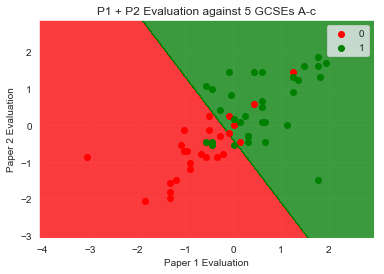

In [52]:
# Visualising the TRAINING set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('P1 + P2 Evaluation against 5 GCSEs A-c')
plt.xlabel('Paper 1 Evaluation')
plt.ylabel('Paper 2 Evaluation')
plt.legend()
plt.show() 

In [53]:
datasetCon.columns

Index(['Surname Forename', 'P1:Q1-M3', 'P1:Q2-M6', 'P1:Q3-M15',
       'GD Sec A Paper1', 'P1:Q1-M24', 'P1:Q2-M16', 'Grade: Paper 1',
       'P2:Q1-M6', 'P2:Q2-M15', 'P2 Q3:-M15', 'P2 Q4:M6', 'P2 Q5:-M14',
       'Paper 2 Secion A Grade', 'P2 Sec B Q1-M24', 'P2 Sec B Q2-M16',
       'Edexcel En P2 Sec B AO5.2 Y11 Mock 2', 'Grade: Paper 2',
       'OVERALL GRADE', 'Apply6thFrm', 'Apply6thFrm_cat'],
      dtype='object')

## Fitting all the Questions % to the LinearRegression() class

In [55]:
# setting up the test and train set
#X = datasetCon[['P1:Q1-M24','P1:Q3-M15']]
X = datasetCon.iloc[:,1:6].values
y=datasetCon["OVERALL GRADE"]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# creatuing a regressor object to fit the training set
from sklearn.linear_model import LinearRegression
# ## 'linear_model'= the library
# ## 'LinearRegression = the class from lib'
regressor = LinearRegression()  #creating the OBJect of the LinearRegression Class -so we call the LinearRegression Class

regressor.fit(X_train, y_train)

regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
y_pred = regressor.predict(X_test)
y_pred

array([2.4546938 , 6.6137535 , 3.48584419, 4.7837119 , 3.32157098,
       2.36937353, 4.41495739, 5.89643675, 4.11409485, 4.88374096,
       4.59567707, 4.59019358, 5.09928322, 4.22143907, 3.11245603,
       4.40215875])

In [58]:
# compare ypred to ytest as a quick overview
# for a,b in zip(y_pred,y_test):
#     print(a,"===",b," Difference: ",b-a)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction, 0 is random 
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

Coefficients: 
 [ 0.01359043  0.00930264  0.02820522 -0.00731516  0.03852658]
Mean squared error: 0.38
Variance score: 0.76
[0.37901368]


In [60]:
datasetCon[colsofinterest].columns

Index(['P1:Q1-M3', 'P1:Q2-M6', 'P1:Q3-M15', 'P1:Q1-M24', 'P1:Q2-M16',
       'P2:Q1-M6', 'P2:Q2-M15', 'P2 Q4:M6', 'P2 Q5:-M14', 'P2 Sec B Q1-M24',
       'P2 Sec B Q2-M16'],
      dtype='object')

# Multi Linear Regression on all questions for their statistical importance on the Overall Grade -- the Optimal Model

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction, 0 is random 
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

Coefficients: 
 [ 0.01359043  0.00930264  0.02820522 -0.00731516  0.03852658]
Mean squared error: 0.38
Variance score: 0.76
[0.37901368]


In [62]:
# Using the stats model and includinf a constant
# this is to ensure 
import statsmodels.api as smm
import statsmodels.formula.api as sm

X = smm.add_constant(datasetCon[colsofinterest])
X = np.array(X)
X = X.astype(np.float64)
Y = np.array(datasetCon['OVERALL GRADE'].values)
Y = Y.astype(np.float64)

regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           2.69e-39
Time:                        19:33:15   Log-Likelihood:                -25.592
No. Observations:                  78   AIC:                             75.18
Df Residuals:                      66   BIC:                             103.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8437      0.528     -1.599      0.115      -1.897       0.210
x1            -0.0013      0.005     -0.257      0.798      -0.012       0.009
x2             0.0055      0.003      1.721      0.090      -0.001       0.012
x3             0.0068      0.005      1.420      0.160      -0.003       0.016
x4             0.0208      0.005      4.426      0.000       0.011       0.030
x5             0.0122      0.006      2.132      0.037       0.001       0.024
x6             0.0020      0.003      0.685      0.496      -0.004       0.008
x7             0.0111      0.004      2.596      0.012       0.003       0.020
x8             0.0032      0.002      1.676      0.098      -0.001       0.007
x9             0.0128      0.003      4.676      0.000       0.007       0.018
x10            0.0103      0.006      1.857      0.068      -0.001       0.021
x11            0.0205      0.007      3.005      0.004       0.007       0.034
==============================================================================
Omnibus:                        2.199   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.686
Skew:                          -0.183   Prob(JB):                        0.430
Kurtosis:                       2.380   Cond. No.                     2.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Backward Elimination

In [63]:
X_opt = X[:,[0,2,3,4,5,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           2.33e-40
Time:                        19:33:16   Log-Likelihood:                -25.631
No. Observations:                  78   AIC:                             73.26
Df Residuals:                      67   BIC:                             99.19
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9611      0.262     -3.662      0.000      -1.485      -0.437
x1             0.0054      0.003      1.718      0.090      -0.001       0.012
x2             0.0071      0.005      1.566      0.122      -0.002       0.016
x3             0.0207      0.005      4.450      0.000       0.011       0.030
x4             0.0120      0.006      2.132      0.037       0.001       0.023
x5             0.0020      0.003      0.709      0.481      -0.004       0.008
x6             0.0109      0.004      2.612      0.011       0.003       0.019
x7             0.0032      0.002      1.669      0.100      -0.001       0.007
x8             0.0130      0.003      4.815      0.000       0.008       0.018
x9             0.0103      0.005      1.875      0.065      -0.001       0.021
x10            0.0203      0.007      3.018      0.004       0.007       0.034
==============================================================================
Omnibus:                        2.152   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.669
Skew:                          -0.184   Prob(JB):                        0.434
Kurtosis:                       2.385   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X_opt = X[:,[0,2,3,4,5,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           2.35e-41
Time:                        19:33:16   Log-Likelihood:                -25.923
No. Observations:                  78   AIC:                             71.85
Df Residuals:                      68   BIC:                             95.41
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8393      0.198     -4.243      0.000      -1.234      -0.445
x1             0.0054      0.003      1.716      0.091      -0.001       0.012
x2             0.0073      0.005      1.619      0.110      -0.002       0.016
x3             0.0201      0.005      4.410      0.000       0.011       0.029
x4             0.0129      0.005      2.365      0.021       0.002       0.024
x5             0.0117      0.004      2.930      0.005       0.004       0.020
x6             0.0032      0.002      1.698      0.094      -0.001       0.007
x7             0.0128      0.003      4.791      0.000       0.007       0.018
x8             0.0105      0.005      1.917      0.059      -0.000       0.021
x9             0.0199      0.007      2.980      0.004       0.007       0.033
==============================================================================
Omnibus:                        2.767   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.134
Skew:                          -0.253   Prob(JB):                        0.344
Kurtosis:                       2.367   Cond. No.                         828.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_opt = X[:,[0,2,4,5,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           6.33e-42
Time:                        19:33:17   Log-Likelihood:                -27.398
No. Observations:                  78   AIC:                             72.80
Df Residuals:                      69   BIC:                             94.01
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9039      0.196     -4.612      0.000      -1.295      -0.513
x1             0.0079      0.003      2.860      0.006       0.002       0.013
x2             0.0219      0.004      4.911      0.000       0.013       0.031
x3             0.0149      0.005      2.760      0.007       0.004       0.026
x4             0.0135      0.004      3.474      0.001       0.006       0.021
x5             0.0037      0.002      1.951      0.055   -8.29e-05       0.007
x6             0.0139      0.003      5.305      0.000       0.009       0.019
x7             0.0095      0.006      1.730      0.088      -0.001       0.020
x8             0.0204      0.007      3.015      0.004       0.007       0.034
==============================================================================
Omnibus:                        2.591   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.920
Skew:                          -0.210   Prob(JB):                        0.383
Kurtosis:                       2.356   Cond. No.                         758.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_opt = X[:,[0,2,4,5,7,8,9,11]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     183.7
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           1.93e-42
Time:                        19:33:17   Log-Likelihood:                -29.053
No. Observations:                  78   AIC:                             74.11
Df Residuals:                      70   BIC:                             92.96
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7817      0.185     -4.216      0.000      -1.152      -0.412
x1             0.0081      0.003      2.909      0.005       0.003       0.014
x2             0.0220      0.005      4.851      0.000       0.013       0.031
x3             0.0144      0.005      2.639      0.010       0.004       0.025
x4             0.0143      0.004      3.635      0.001       0.006       0.022
x5             0.0032      0.002      1.685      0.096      -0.001       0.007
x6             0.0134      0.003      5.068      0.000       0.008       0.019
x7             0.0288      0.005      6.001      0.000       0.019       0.038
==============================================================================
Omnibus:                        2.067   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.750
Skew:                          -0.230   Prob(JB):                        0.417
Kurtosis:                       2.428   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X_opt = X[:,[0,2,4,5,8,9,11]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     181.0
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           5.67e-41
Time:                        19:33:17   Log-Likelihood:                -35.795
No. Observations:                  78   AIC:                             85.59
Df Residuals:                      71   BIC:                             102.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7185      0.200     -3.595      0.001      -1.117      -0.320
x1             0.0126      0.003      4.634      0.000       0.007       0.018
x2             0.0238      0.005      4.876      0.000       0.014       0.034
x3             0.0163      0.006      2.762      0.007       0.005       0.028
x4             0.0033      0.002      1.634      0.107      -0.001       0.007
x5             0.0138      0.003      4.820      0.000       0.008       0.019
x6             0.0302      0.005      5.845      0.000       0.020       0.041
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.481
Skew:                          -0.157   Prob(JB):                        0.786
Kurtosis:                       3.222   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_opt = X[:,[0,2,4,5,9,11]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     211.8
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           1.36e-41
Time:                        19:33:18   Log-Likelihood:                -37.235
No. Observations:                  78   AIC:                             86.47
Df Residuals:                      72   BIC:                             100.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6639      0.199     -3.331      0.001      -1.061      -0.267
x1             0.0133      0.003      4.919      0.000       0.008       0.019
x2             0.0237      0.005      4.802      0.000       0.014       0.034
x3             0.0168      0.006      2.818      0.006       0.005       0.029
x4             0.0153      0.003      5.581      0.000       0.010       0.021
x5             0.0309      0.005      5.932      0.000       0.021       0.041
==============================================================================
Omnibus:                        2.375   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                1.674
Skew:                          -0.241   Prob(JB):                        0.433
Kurtosis:                       3.532   Cond. No.                         538.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""